In [14]:
#https://currents.soest.hawaii.edu/ocn_data_analysis/_static/eof.html

In [15]:
%matplotlib inline

from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

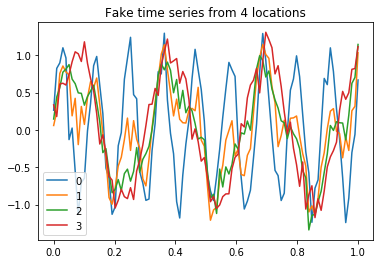

In [16]:
nx = 4
nt = 100
t = np.linspace(0, 1, nt)
dat = np.zeros((nt, nx), dtype=float)
y1 = np.sin(t * (2 * np.pi / 0.11))
y2 = np.sin(t * (2 * np.pi / 0.31))
dat[:,0] = y1
dat[:,1] = 0.5 * y1 + 0.6 * y2
dat[:,2] = 0.25 * y1 + 0.8 * y2
dat[:,3] = y2
# Save a copy of the pure signal.
signaldat = dat.copy()

#add noise
noisefac = 0.15
np.random.seed(0) # make the "random" numbers repeatable
dat += noisefac * np.random.randn(nt, nx)

fig, ax = plt.subplots()
ax.plot(t, dat) # plot the 4 time series (columns)
ax.set_title("Fake time series from 4 locations")
ax.legend(["0", "1", "2", "3"])

In [7]:
datmean = dat.mean(axis=0) # time mean
dat_dm = dat - datmean # numpy broadcasting at work...

covdat = np.dot(dat_dm.T, dat_dm) / nt # matrix multiplication 
# this is the same as nt * np.cov(dat, bias=True)
vals, vecs = np.linalg.eig(covdat)
print("Covariance matrix is:\n", covdat)
print("Eigenvalues are:\n", vals)
print("Eigenvectors are columns of:\n", vecs)

Covariance matrix is:
 [[ 0.50871278  0.24546301  0.11687411 -0.00233331]
 [ 0.24546301  0.31461159  0.2830365   0.2856888 ]
 [ 0.11687411  0.2830365   0.33663063  0.37870861]
 [-0.00233331  0.2856888   0.37870861  0.51310968]]
Eigenvalues are:
 [1.09710862 0.53671203 0.02307027 0.01617376]
Eigenvectors are columns of:
 [[-0.31656187 -0.8578794  -0.40356405 -0.03110597]
 [-0.50989967 -0.16339769  0.7123446   0.45372756]
 [-0.53468016  0.14692667  0.16987344 -0.81466109]
 [-0.5949017   0.46449617 -0.5484927   0.35984862]]


time means after projection:
 [-1.33226763e-17  2.42861287e-17 -4.10782519e-17 -1.08246745e-17]
are all very small.


Text(0.5, 1.0, 'EOF temporal functions')

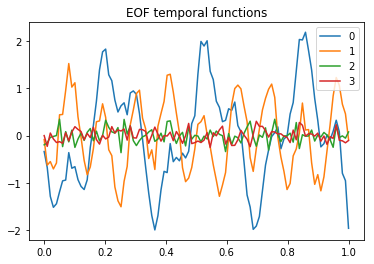

In [9]:
# These are the principal components 
tvecs = np.dot(dat_dm, vecs)  # projection on new basis
print("time means after projection:\n", tvecs.mean(axis=0))
print("are all very small.")
plt.figure()
plt.plot(t, tvecs)
plt.legend(["0", "1", "2", "3"])
plt.title("EOF temporal functions")

In [10]:
print(dat_dm.shape, vecs.shape, vals.shape, tvecs.shape)

(100, 4) (4, 4) (4,) (100, 4)


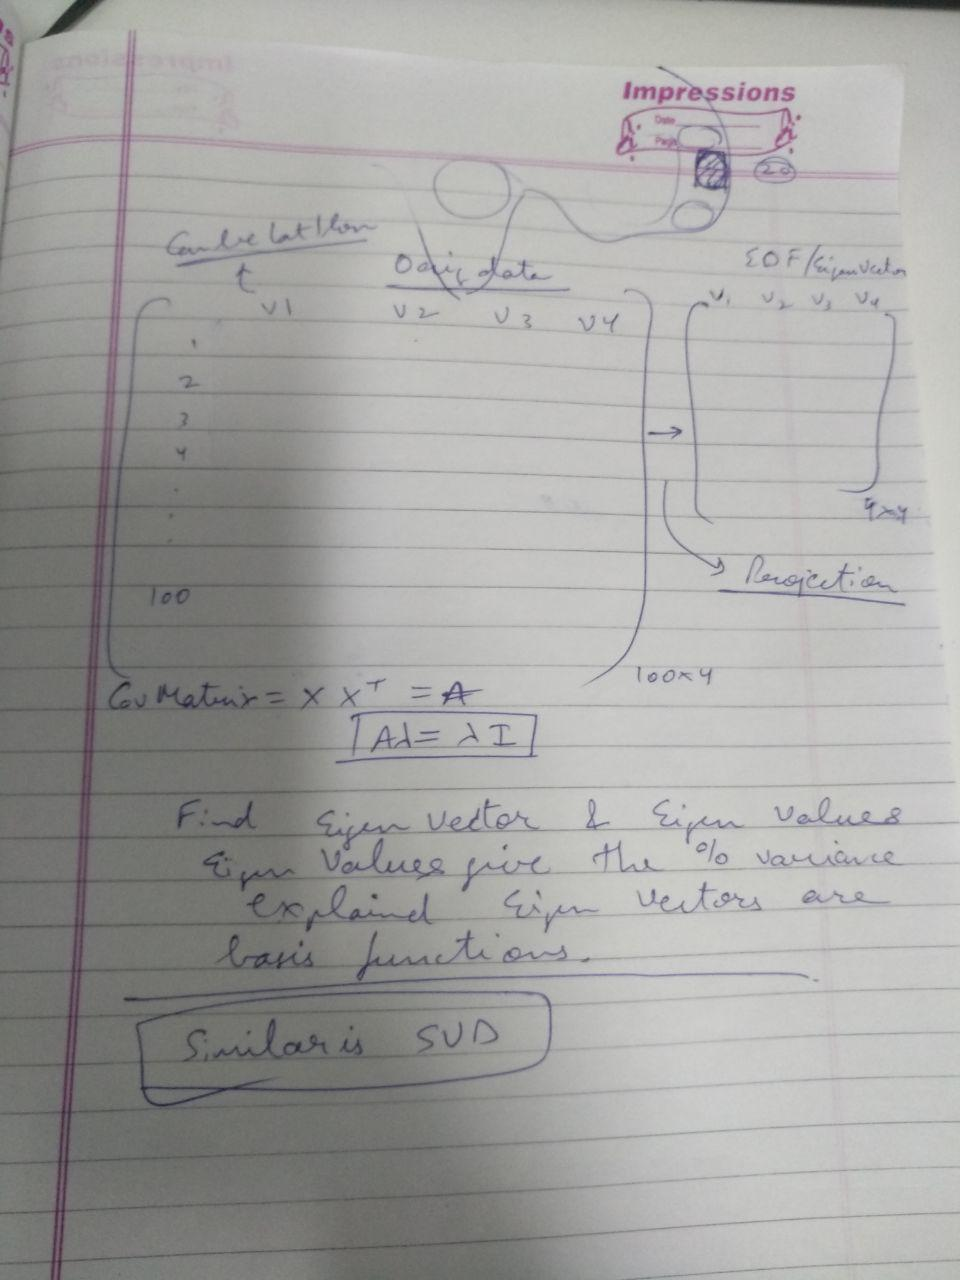